<a href="https://colab.research.google.com/github/UsikaDesu/Capstone-Project-Mood-Detection/blob/main/New_Mood_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_path = '/content/drive/MyDrive/Colab Notebooks/FER-2013.zip'

# Define the extraction path
extract_path = '/content/extracted_images'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('Zip file extracted.')


Zip file extracted.


In [ ]:
import numpy as np
from PIL import Image

In [ ]:
def load_images_from_folder(folder, label_map):
    images = []
    labels = []
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                img = img.convert('RGB')  # Ensure image is in RGB format
                img_array = np.array(img)
                images.append(img_array)

            # Extract the label from the folder structure
            label_name = os.path.basename(root)
            if label_name in label_map:
                label = label_map[label_name]
                labels.append(label)
            else:
                print(f"Warning: {label_name} not in label map.")

    return images, labels


In [ ]:
# Define the label map (assuming you have 7 labels)
label_map = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Load images and labels
image_dir = extract_path + '/train'
images, labels = load_images_from_folder(image_dir, label_map)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Save the numpy arrays to .npy files
np.save('/content/drive/My Drive/images.npy', images)
np.save('/content/drive/My Drive/labels.npy', labels)

print('Images and labels saved to .npy files.')

Images and labels saved to .npy files.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from keras import layers
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.transform import resize

import h5py

In [ ]:
image=np.load('/content/drive/MyDrive/images.npy')

In [ ]:
labels=np.load('/content/drive/MyDrive/labels.npy')

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Model parameters
num_classes = 7
input_shape = (48,48,3)

# Define the model architecture
input_layer = Input(shape=input_shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output_layer = Dense(num_classes, activation='softmax')(x)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0009), metrics=['accuracy'])


6

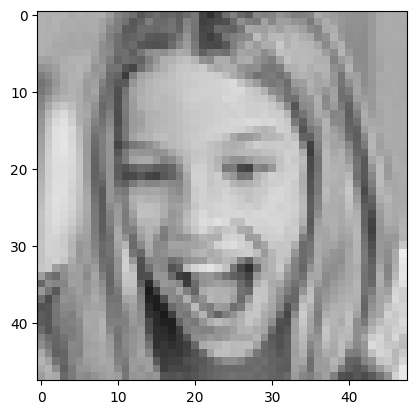

In [ ]:
plt.imshow(image[5])
labels[5]

In [ ]:
from sklearn.model_selection import train_test_split
# Load your existing images.npy as your data
data = np.load('/content/drive/MyDrive/images.npy')

# Load your existing labels.npy as your labels
labels = np.load('/content/drive/MyDrive/labels.npy')

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Optionally, you can print the shapes to verify
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Validation labels shape: {y_val.shape}')

# Save the validation data and labels as .npy files
np.save('/content/drive/My Drive/x_val.npy', x_val)
np.save('/content/drive/My Drive/y_val.npy', y_val)

print('Validation data and labels saved as .npy files.')

Training data shape: (22967, 48, 48, 3)
Training labels shape: (22967,)
Validation data shape: (5742, 48, 48, 3)
Validation labels shape: (5742,)
Validation data and labels saved as .npy files.


In [ ]:
x_val=np.load('/content/drive/MyDrive/x_val.npy')

In [ ]:
y_val=np.load('/content/drive/MyDrive/y_val.npy')

0

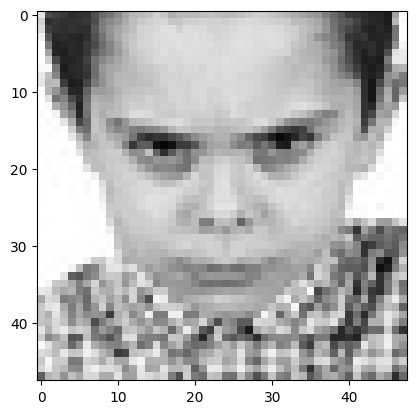

In [ ]:
plt.imshow(x_val[15])
y_val[15]

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=25, verbose=1, restore_best_weights=True, min_delta=0.01,
                              baseline=0.6)

In [ ]:
model.fit(image, labels, epochs=25, batch_size=300, validation_data=(x_val,y_val), callbacks=[early_stopping])

Epoch 1/25
96/96 [==============================] - 10s 34ms/step - loss: 3.9360 - accuracy: 0.2248 - val_loss: 1.7737 - val_accuracy: 0.2835
Epoch 2/25
96/96 [==============================] - 2s 22ms/step - loss: 1.7883 - accuracy: 0.2642 - val_loss: 1.7381 - val_accuracy: 0.3023
Epoch 3/25
96/96 [==============================] - 2s 23ms/step - loss: 1.7431 - accuracy: 0.2935 - val_loss: 1.6735 - val_accuracy: 0.3325
Epoch 4/25
96/96 [==============================] - 2s 26ms/step - loss: 1.6907 - accuracy: 0.3292 - val_loss: 1.6122 - val_accuracy: 0.3758
Epoch 5/25
96/96 [==============================] - 2s 23ms/step - loss: 1.6324 - accuracy: 0.3619 - val_loss: 1.5598 - val_accuracy: 0.4049
Epoch 6/25
96/96 [==============================] - 2s 23ms/step - loss: 1.5904 - accuracy: 0.3866 - val_loss: 1.5090 - val_accuracy: 0.4228
Epoch 7/25
96/96 [==============================] - 2s 22ms/step - loss: 1.5554 - accuracy: 0.4000 - val_loss: 1.4934 - val_accuracy: 0.4277
Epoch 8/25
9

In [ ]:
model.save('MyModelFaceRecogD3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
